#### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/XAUUSD_H4.csv").drop(columns=["real_volume"])
xau = pd.DataFrame(df["time"])

xau["close"] = df["close"]
xau.drop(columns=["time"], inplace=True)
data = xau.values

print("data[0] : ", data[0])
print("shape : ", np.array(data).shape)
xau

data[0] :  [1324.74]
shape :  (10000, 1)


,close
0,1324.74
1,1299.68
2,1301.01
3,1275.91
4,1277.11
...,...
9995,2017.14
9996,2015.83
9997,2018.04
9998,2023.75


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

print("data[0] : ", data[0])
print("shape : ", np.array(data).shape)

data[0] :  [0.20944738]
shape :  (10000, 1)


In [4]:
features = []
labels = []

for i in range(60, len(data)):
    features.append(data[i-60:i])
    labels.append(data[i])

features = np.array(features)
labels = np.array(labels)
split_constant = int(features.shape[0]*0.8)
split_constant = -50

Xtrain, Xtest = features[:split_constant], features[split_constant:]
ytrain, ytest = labels[:split_constant], labels[split_constant:]

print("Xtrain[59] : ", Xtrain[59])
print("Xtrain shape : ", Xtrain.shape)
print("ytrain[0] : ", ytrain[0])
print("ytrain shape : ", ytrain.shape)

Xtrain[59] :  [[0.09113164]
 [0.08939671]
 [0.09003534]
 [0.07219644]
 [0.06693844]
 [0.06270223]
 [0.06022224]
 [0.06222326]
 [0.06560797]
 [0.0623297 ]
 [0.05967941]
 [0.05065353]
 [0.05352733]
 [0.06356437]
 [0.06336214]
 [0.05652887]
 [0.05933881]
 [0.07210065]
 [0.06872658]
 [0.06896075]
 [0.06281931]
 [0.06503321]
 [0.06905654]
 [0.06948229]
 [0.06719389]
 [0.06278738]
 [0.05745487]
 [0.06290446]
 [0.06406463]
 [0.06965259]
 [0.06573569]
 [0.0614782 ]
 [0.05986035]
 [0.04978074]
 [0.04753491]
 [0.04173408]
 [0.04973816]
 [0.04266008]
 [0.04621509]
 [0.04098902]
 [0.04611929]
 [0.04956786]
 [0.04887602]
 [0.04985525]
 [0.04426729]
 [0.0503555 ]
 [0.0520585 ]
 [0.04769457]
 [0.05261197]
 [0.0401588 ]
 [0.04044619]
 [0.04901439]
 [0.04477818]
 [0.04982331]
 [0.04567226]
 [0.04558711]
 [0.04650247]
 [0.04260686]
 [0.0441502 ]
 [0.04353287]]
Xtrain shape :  (9890, 60, 1)
ytrain[0] :  [0.08939671]
ytrain shape :  (9890, 1)


#### Model Training and Testing

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, InputLayer
from keras.optimizers import Adam

physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Number of GPU: ", len(physical_devices))
print(physical_devices)

if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using TensorFlow backend.


Number of GPU:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
model = Sequential()

model.add(InputLayer(input_shape=(Xtrain.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [7]:
model.fit(Xtrain, ytrain, epochs=1, batch_size=10)

Epoch 1/1
9890/9890 [==============================] - 258s 26ms/step - loss: 0.0075


In [11]:
predictions = model.predict(Xtest)


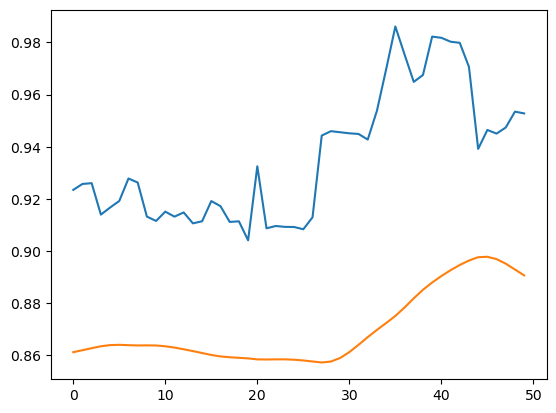

In [12]:
predictions.tolist()
plt.plot(ytest)
plt.plot(predictions)

In [13]:
model.save("data/model.h5")